In [3]:
import tensorcircuit as tc
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from scipy.linalg import expm, sinm, cosm
K=tc.set_backend("tensorflow")

In [4]:
def I(n):
    return np.array([1 if i%(n+1)==0 else 0 for i in range(n*n)]).reshape(n,n)
def ZERO(n):
    return np.array([0 for i in range(n*n)]).reshape(n,n)
def _exp(mat,t):
    return np.cos(t)*I(mat.shape[0])+1j*np.sin(t)*mat;
def conj_tr(v):
    return np.conj(v.transpose())
def expect(mat,v):
    return np.matmul(np.matmul(conj_tr(v),mat),v)[0][0]

tx=np.array([[0,1],[1,0]])
ty=np.array([[0,-1j],[1j,0]])
tz=np.array([[1,0],[0,-1]])
v0=np.array([[1],[0]])
v1=np.array([[0],[1]])

### 1.2.1

give a degree theta
3


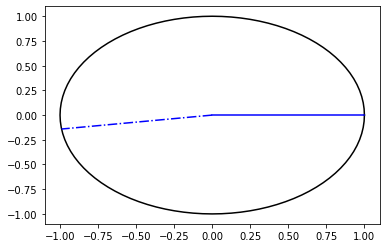

In [5]:
print('give a degree theta')
theta=float(input())
def R(x):
    return np.array([[np.cos(x),np.sin(x)],[-np.sin(x),np.cos(x)]])

def draw_circle(avg=""):
    x_arr,y_arr=[],[]
    for i in range(101):
        t=np.pi/50*i;
        x_arr.append(np.cos(t))
        y_arr.append(np.sin(t))
    plt.plot(x_arr,y_arr,avg)

def draw_line(ax,ay,bx,by,avg=""):
    x_arr,y_arr=[ax,bx],[ay,by]
    plt.plot(x_arr,y_arr,avg)

v=np.array([[1],[0]])
u=np.matmul(R(theta),v)

plt.clf()
draw_circle('k-')
draw_line(0,0,1,0,'b')
draw_line(0,0,u[0][0],u[1][0],'b-.')
plt.show()

### 1.2.2

In [6]:
print(expm(1.j*tx))
print(expm(1.j*ty))
print(expm(1.j*tz))

[[0.54030231+0.j         0.        +0.84147098j]
 [0.        +0.84147098j 0.54030231+0.j        ]]
[[ 0.54030231+0.j  0.84147098+0.j]
 [-0.84147098+0.j  0.54030231+0.j]]
[[0.54030231+0.84147098j 0.        +0.j        ]
 [0.        +0.j         0.54030231-0.84147098j]]


In [7]:
def test(theta):
    print(np.allclose(expm(theta*1.j*tx),_exp(tx,theta), atol=0.0001))

In [8]:
test(1)

True


注意到任意一个泡利矩阵 $\hat{P}$ 都有性质 $P^2=\bar{P}^T=I$ 。
对 $e^{i\theta\hat{P}}$ ，我们将它泰勒展开，只会有 $I,iP$ 两项，系数分别是 $\cos(\theta)$ 和$\sin(\theta)$ 的泰勒展开，得证。

若矩阵欧拉公式 $e^{i\theta P}=\cos(\theta)I+i\sin(\theta)P$ 对任意 $\theta$ 成立，我们取 $-\theta$ 可以得到$e^{-i\theta P}=\cos(\theta)I-i\sin(\theta)P$

故 $I=e^{i\theta P}\times e^{-i\theta P}=\cos^2(\theta)I^2-i^2\sin^2(\theta)P^2=\cos^2(\theta)I+\sin^2(\theta)P^2$

比较各元素可知 $P^2=I$ ，由上述证明易知这样的 $P$ 满足公式。

故 $P$ 满足该公式当且仅当 $P^2=I$ 

### 1.2.3

In [9]:
Pauli=[np.array([[1,0],[0,1]]),tc.gates._x_matrix,tc.gates._y_matrix,tc.gates._z_matrix]
def expectation(p,q,theta):
    P=Pauli[p]
    Q=Pauli[q]
    v=expm(1.j*theta/2*P)*np.matrix([1,0]).transpose()
    return (v.conj().transpose()@Q@v)[0,0]

In [10]:
expectation(2,3,3)

(-0.9899924966004452+0j)

/home/tencent_go/anaconda3/envs/tc/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


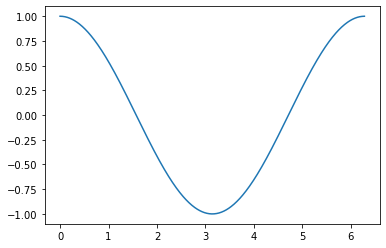

In [11]:
plt.clf()
x = np.arange(0, 2 * np.pi, 0.01)
plt.plot(x, [expectation(1,3, t) for t in x])
plt.show()

### 1.2.4

In [12]:
n=int(input())
H = np.zeros((2**n, 2**n))
for i in range(n):
    H += np.kron(np.kron(np.identity(2**i),tc.gates._z_matrix),np.identity(2**(n-i-1)))
for i in range(n-1):
    H += np.kron(np.kron(np.identity(2**i),tc.gates._x_matrix),np.identity(2**(n-i-1)))*np.kron(np.kron(np.identity(2**(i+1)),tc.gates._x_matrix),np.identity(2**(n-i-2)))
print(H)
print(H[0,0])

3
[[ 3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -3.]]
3.0


### 1.2.5

In [13]:
def multi_kron(arr):
    ans=I(1)
    for i in arr:
        ans=np.kron(ans,i)
    return ans
print(1/np.sqrt(2)*(multi_kron([v0,v1,v0])-multi_kron([v1,v0,v1])))

[[ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]]


### 1.3.1

In [14]:
def number_differential(f,x,delta):
    return (f(x+delta)-f(x))/delta

# sample
print(number_differential(np.sin,1,1e-6),np.cos(1),number_differential(np.sin,1,1e-6)-np.cos(1))

0.5403018851213304 0.5403023058681398 -4.2074680939307996e-07


### 1.3.2

$$
\begin{align}
f'(x)=&A\cos(x+B)=\dfrac{A\sin(x+\delta+B)-A\sin(x-\delta+B)}\tau\\
=&\dfrac{2A\cos (x+B)\sin \delta}\tau\Rightarrow\\
\tau=&2\sin\delta\\
f'(x)=&\dfrac{A\sin(x+\delta+B)-A\sin(x-\delta+B)}{2\sin\delta}=\dfrac{f(x+\delta)-f(x-\delta)}{2\sin\delta}\\
\end{align}
$$

In [15]:
def sin_differential(x,A,B,delta=1):
    t=np.sin(delta)*2
    return (A*np.cos(x+B),(A*np.sin(x+delta+B)-A*np.sin(x-delta+B))/t)

# sample
print(sin_differential(1,2,3))

(-1.3072872417272239, -1.3072872417272239)


### 1.3.3

不难发现，$f=A\sin(x+B)$，其中$A=\{0,1\}$，所以：

$$
f'(x)=\dfrac{f(x+1)-f(x-1)}{2\sin 1}
$$

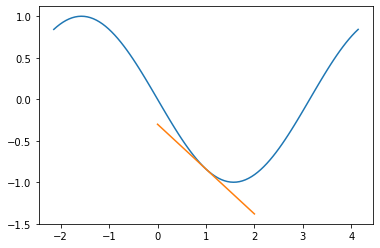

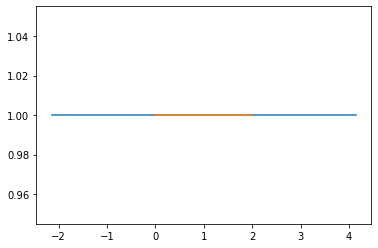

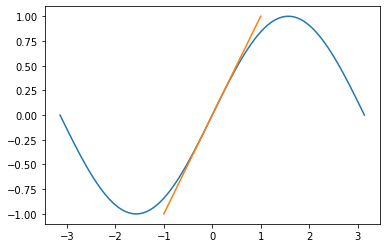

In [16]:
def f(id1,id2):
    Mat=[I(2),tx,ty,tz]
    class test_1_helper:
        def __init__(self,p,q):
            self.P=p
            self.Q=q
        def __call__(self,t):
            vt=np.matmul(_exp(self.P,t/2),v0)
            return expect(self.Q,vt).real
    return test_1_helper(Mat[id1],Mat[id2])

def draw_function(f,s,t,point_num,avg=""):
    x_arr,y_arr=[],[]
    for i in range(point_num+1):
        v=s+(t-s)*1./point_num*i;
        x_arr.append(v)
        y_arr.append(f(v))
    plt.plot(x_arr,y_arr)

def f_differential(id1,id2,x):
    t=np.sin(1)*2
    F=f(id1,id2)
    return (F(x+1)-F(x-1))/t

def check(id1,id2,x):
    F=f(id1,id2)
    y=F(x)
    dy=f_differential(id1,id2,x)
    plt.clf()
    draw_function(F,x-np.pi,x+np.pi,100)
    draw_line(x-1,y-dy,x+1,y+dy)
    plt.show()

# sample
check(2,1,1)
check(2,0,1)
check(1,2,0)

### 1.3.4

In [17]:
def expectation_of_matrix(a0,a1,theta):
    P=Pauli[a0]
    Q=Pauli[a1]
    v_theta=np.matmul(expm(0.5*1j*theta*P),v0)
    intermediate=np.matmul(Q,v_theta)
    return np.matmul(np.transpose(v_theta).conj(),intermediate)

def differential_z_1(f,x,y,z):
    delta=np.pi/6
    diff1=f(x,y,z+delta)-f(x,y,z-delta)
    return diff1


def found_min_f(step,x_0,g):
    f_min=g(1,2,x_0)
    diff=differential_z_1(g,1,2,x_0)
    while abs(diff)>=0.001:
        f_temp=g(1,2,x_0-step*diff)
        if f_temp<f_min:
            x_0=x_0-step*diff
            f_min=f_temp
        else:
            step=step/2
        diff=differential_z_1(g,1,2,x_0)
    return f_min,x_0

f_min,x_0=found_min_f(0.1,0.25*np.pi,expectation_of_matrix)
print(f_min,x_0)

[[-0.99999955+0.j]] [[-1.56984791+0.j]]


### 1.3.5

In [19]:
tc.set_dtype("complex128")

def expectation_of_matrix_1(a0,a1,theta):
    P=Pauli[a0]
    P=tc.array_to_tensor(P)
    Q=Pauli[a1]
    Q=tc.array_to_tensor(Q)
    v_theta=tc.backend.expm(0.5*1j*theta*P)@v0
    intermediate=Q@v_theta
    return K.real((K.transpose(K.conj(v_theta))@intermediate)[0][0])

def found_min_f_1(step,x_0,g):
    f_min=g(1,2,x_0)
    diff=K.grad(g,argnums=2)(1,2,x_0)
    while abs(diff)>=1e-3:
        f_temp=g(1,2,x_0-step*diff)
        if f_temp<f_min:
            x_0=x_0-step*diff
            f_min=f_temp
        else:
            step=step/2
        diff=K.grad(g,argnums=2)(1,2,x_0)
    return f_min,x_0
    
f_min,x_0=found_min_f_1(0.1,tc.array_to_tensor(0.25*np.pi),expectation_of_matrix_1)
print(f_min,x_0)

tf.Tensor(-0.9999995502491636, shape=(), dtype=float64) tf.Tensor((-1.5698479061394408+0j), shape=(), dtype=complex128)


### 1.4.1

In [20]:
def n_qbit_circuit1(n):
    c=tc.Circuit(n)
    c.h(0)
    for i in range(1,n):
        c.cnot(0,i)
    print(c.state())
    print(c.draw())

def n_qbit_circuit2(n):
    c=tc.Circuit(n)
    for i in range(n):
        c.h(i)
    print(c.state())
    print(c.draw())

n_qbit_circuit1(2)
n_qbit_circuit2(2)

def given_transpose():
    c=tc.Circuit(3)
    c.ANY(0,unitary=tc.array_to_tensor([[0,1],[1,0]]),name="U1")
    c.ANY(1,unitary=tc.array_to_tensor([[1,0],[0,-1]]),name="U2")
    c.cswap(2,0,1)
    print(c.state())
    print(c.draw())

given_transpose()

tf.Tensor([0.70710677+0.j 0.        +0.j 0.        +0.j 0.70710677+0.j], shape=(4,), dtype=complex128)
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
tf.Tensor([0.49999998+0.j 0.49999998+0.j 0.49999998+0.j 0.49999998+0.j], shape=(4,), dtype=complex128)
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘
tf.Tensor([0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j], shape=(8,), dtype=complex128)
     ┌────┐   
q_0: ┤ U1 ├─X─
     ├────┤ │ 
q_1: ┤ U2 ├─X─
     └────┘ │ 
q_2: ───────■─
              


对第一个量子线路，考虑将第一个量子比特经Hadamard门转换为 $|0\rangle+|1\rangle$,再用CNOT门将其余量子比特进行控制

对第二个量子线路，每个量子比特经Hadamard门转换为 $|0\rangle+|1\rangle$，即得到结果

 对第三个量子线路，引入辅助量子比特，用辅助量子比特与CSWAP门使得经U1与U2变换的量子态形成叠加

### 1.4.2

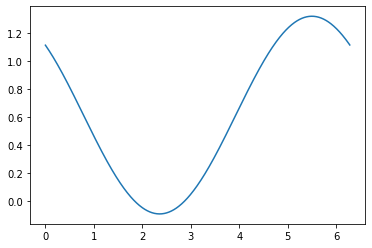

tf.Tensor(
[[-0.35355338 -0.6123724 ]
 [-0.70710677 -0.70710677]], shape=(2, 2), dtype=float32)
tf.Tensor(-0.707106747077096, shape=(), dtype=float64)


In [21]:
def exp_sumz(n,nlayers,param):
    c=tc.Circuit(n)
    for j in range(nlayers):
        for i in range(n):
            c.rx(i,theta=param[i][j])
        for i in range(n-1):
            c.cnot(i,i+1)
    return K.real(K.sum([c.expectation_ps(z=[i]) for i in range(n)]))

X=np.arange(0,2*np.pi,0.01)
plt.plot(X,[exp_sumz(2,2,[[np.pi/6,np.pi/4],[np.pi/4,x]]) for x in X])
plt.show()
print(K.grad(exp_sumz, argnums=2)(2,2,K.convert_to_tensor([[np.pi/6,np.pi/4],[np.pi/4,np.pi/4]])))

print(exp_sumz(2,2,[[np.pi/6,np.pi/4],[np.pi/4,np.pi/4+np.pi/6]])-
      exp_sumz(2,2,[[np.pi/6,np.pi/4],[np.pi/4,np.pi/4-np.pi/6]]))

验证参数平移在多个参数时是否仍然成立

### 1.4.3

#### 用 CNOT 门实现 SWAP 门

如果已知可以不用辅助位只用控制非门实现交换门，那么可以做如下考量：线路上仅能执行两种控制非门，而连续执行两个相同的控制非门没有任何意义，所以相邻两个控制非门的控制位与目标位一定分别不同。又两位地位相同，因而可以模拟单一过程直到发现执行了交换门，并发现为 3 次。

实际上 OI 中存在一种交换两数 `std::enable_if_t<std::is_unsigned_v<T>, T> a, b;` 的方法 `a ^= b ^= a ^= b`，分解到每一位上实际上就是这个过程（控制非门对应于异或赋值）。

```python
c = tc.Circuit(2)

c.cnot(0, 1)
c.cnot(1, 0)
c.cnot(0, 1)

d = tc.Circuit(2)
d.swap(0, 1)

print(np.allclose(c.matrix(), d.matrix()))
c.draw(output='mpl')
```

![](./swap_by_cnot.png)

#### 用 CNOT 门和 Rz 门实现 Rzz 门

$$
\begin{aligned}
R_z(\theta)&=\exp\left(-i\theta/2\hat Z\right).\\
R_{zz}(\theta)&=\exp\left(-i\theta/2\hat Z\otimes\hat Z\right).
\end{aligned}
$$

简单计算知

$$
\hat Z\otimes\hat Z=\begin{pmatrix}
1&0&0&0\\
0&-1&0&0\\
0&0&-1&0\\
0&0&0&1
\end{pmatrix}.
$$

感性理解，$|00\rangle,|11\rangle$ 对应一位的 $|0\rangle$，$|01\rangle,|10\rangle$ 对应 $|1\rangle$，这可以通过控制非做到。

```python
c = tc.Circuit(2)

theta = float(input())

c.cnot(0, 1)
c.rz(1, theta = theta)
c.cnot(0, 1)
c.cnot(1, 0)
c.rz(0, theta = theta)
c.cnot(1, 0)

d = tc.Circuit(2)
d.rzz(0, 1, theta=theta)

print(np.allclose(c.matrix(), d.matrix()))
c.draw(output='mpl')
```

![](./rzz_by_cnot_rz.png)

容易计算验证。

### 1.4.4

考虑以下代码实现的线路及测量的得到的结果。

```python
def hmtest(s, u):
    np.testing.assert_allclose(
        np.conj(u) @ np.transpose(u), np.eye(u.shape[-1]), atol=1e-6
    )
    input_state = np.kron(np.array([1, 0]), s)
    n = int(np.log(s.shape[-1]) / np.log(2))
    c = tc.Circuit(n + 1, inputs=input_state)
    c.H(0)
    c.multicontrol(*range(n + 1), ctrl=[1], unitary=u)
    c.H(0)
    return c.expectation_ps(z=[0])


hmtest(
    np.array([1.0, 0, 0, 0]),
    np.kron(np.array([[1.0, 0], [0, -1]]), np.array([[1.0, 0], [0, -1]])),
)
```

理解线路图，其实际上计算的是 $v^{\mathsf T}\hat Zv$，其中

$$
v=\frac12
\begin{pmatrix}
I&I\\
I&-I\\
\end{pmatrix}
\begin{pmatrix}
I&0\\
0&U\\
\end{pmatrix}
\begin{pmatrix}
I&I\\
I&-I\\
\end{pmatrix}
\begin{pmatrix}
S\\
0
\end{pmatrix}=\frac12
\begin{pmatrix}
S+US\\
S-US
\end{pmatrix}.
$$

即测量 $\hat Z$ 关于 $\displaystyle\frac12
\begin{pmatrix}
S+US\\
S-US
\end{pmatrix}$ 的期望。